In [1]:
import numpy as np

from commons import *
from dataset_loader import load_images, prepare_dataset
from IPython.display import display
import cv2
import pickle
import matplotlib.pyplot as plt
from keras.models import load_model


# TODO: https://pl.wikipedia.org/wiki/Dywergencja_Kullbacka-Leiblera
# https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810
# TODO: entropia wzajemna, cross entropy


DOTS_SRC = 'hit-images-final2/dot'
TRACKS_SRC = 'hit-images-final2/line'
WORMS_SRC = 'hit-images-final2/worms'
ARTIFACTS_SRC = 'hit-images-final2/artefact'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'



dots_set =  prepare_dataset(load_images(DOTS_SRC))
worms_set =  prepare_dataset(load_images(WORMS_SRC))
tracks_set =  prepare_dataset(load_images(TRACKS_SRC))
artifacts_set =  prepare_dataset(load_images(ARTIFACTS_SRC))

dots_autoencoder = load_model(DOTS_AC)
worms_autoencoder = load_model(WORMS_AC)
tracks_autoencoder = load_model(TRACKS_AC)
artifacts_autoencoder = load_model(ARTIFACTS_AC)

In [2]:
config = {}

dm_funcs = [dm_func_mean2, dm_func_avg_hash, dm_func_p_hash, dm_func_d_hash, dm_func_haar_hash, dm_func_db4_hash] #  , dm_func_cr_hash, dm_func_color_hash
#dm_funcs = [dm_func_mean2]
cutoff_backgrounds = [True, False]
normalizes = [True, False]
autoencoders = [
    (dots_autoencoder, 'dots'),
    (worms_autoencoder, 'worms'),
    (tracks_autoencoder, 'tracks'),
    (artifacts_autoencoder, 'artifacts')
]

for autoencoder, name in autoencoders:
    for cutoff_background in cutoff_backgrounds:
        for normalize in normalizes:
            rows = []
            for dm_func in dm_funcs:
                print('====| dm_func = %s, cutoff_background = %s, normalize = %s |====' % (str(dm_func.__name__), str(cutoff_background), str(normalize)))
                argv = {'cutoff_background': cutoff_background, 'normalize': normalize, 'dm_func': dm_func}

                calculated = calc_similarity(dots_autoencoder, dots_set, tracks_set, worms_set, artifacts_set, **argv)
                rows.append((dm_func.__name__, str(cutoff_background), str(normalize), calculated))
            config[(autoencoder, cutoff_background, normalize)] = rows

====| dm_func = dm_func_mean2, cutoff_background = True, normalize = True |====
====| dm_func = dm_func_avg_hash, cutoff_background = True, normalize = True |====
====| dm_func = dm_func_p_hash, cutoff_background = True, normalize = True |====
====| dm_func = dm_func_d_hash, cutoff_background = True, normalize = True |====
====| dm_func = dm_func_haar_hash, cutoff_background = True, normalize = True |====
====| dm_func = dm_func_db4_hash, cutoff_background = True, normalize = True |====
====| dm_func = dm_func_mean2, cutoff_background = True, normalize = False |====
====| dm_func = dm_func_avg_hash, cutoff_background = True, normalize = False |====
====| dm_func = dm_func_p_hash, cutoff_background = True, normalize = False |====
====| dm_func = dm_func_d_hash, cutoff_background = True, normalize = False |====
====| dm_func = dm_func_haar_hash, cutoff_background = True, normalize = False |====
====| dm_func = dm_func_db4_hash, cutoff_background = True, normalize = False |====
====| dm_f

Channel dots, compare dots vs tracks, threshold: -11.494229184177545, fp/fn percent: 3.6639676113360324 %
Channel dots, compare dots vs worms, threshold: -11.058930160565875, fp/fn percent: 2.699283002952341 %
Channel dots, compare dots vs artifacts, threshold: -11.688968894352833, fp/fn percent: 4.204680682268941 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 75.2834008097166 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.94306199915648 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 60.93117408906883 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.43694643610291 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 56.19433198380567 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/

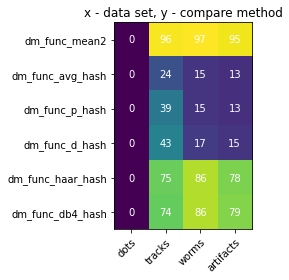

Channel dots, compare dots vs tracks, threshold: -6.52860452219133, fp/fn percent: 1.3157894736842104 %
Channel dots, compare dots vs worms, threshold: -5.516561019595272, fp/fn percent: 0.25305778152678193 %
Channel dots, compare dots vs artifacts, threshold: -7.501074362103835, fp/fn percent: 8.647362157873859 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 75.2834008097166 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.94306199915648 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 60.93117408906883 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.43694643610291 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 56.19433198380567 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn

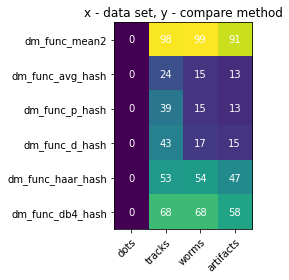

Channel dots, compare dots vs tracks, threshold: -11.366265015455767, fp/fn percent: 3.54251012145749 %
Channel dots, compare dots vs worms, threshold: -10.788453178268721, fp/fn percent: 2.446225221425559 %
Channel dots, compare dots vs artifacts, threshold: -11.499367081508929, fp/fn percent: 4.165013883379611 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 75.32388663967612 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.85870940531422 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 86.59262197540659 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 60.8502024291498 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.22606495149726 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 80.80126933756446 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 56.63967611336032 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn

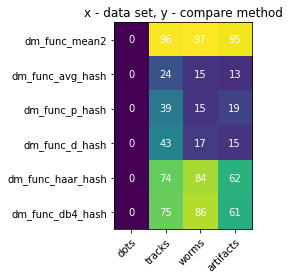

Channel dots, compare dots vs tracks, threshold: -6.323144057457658, fp/fn percent: 1.3360323886639678 %
Channel dots, compare dots vs worms, threshold: -5.174514935142659, fp/fn percent: 0.1687051876845213 %
Channel dots, compare dots vs artifacts, threshold: -8.349442433274675, fp/fn percent: 26.97342324474415 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 75.32388663967612 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.85870940531422 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 86.59262197540659 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 60.8502024291498 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn percent: 84.22606495149726 %
Channel dots, compare dots vs artifacts, threshold: 0.0, fp/fn percent: 80.80126933756446 %
Channel dots, compare dots vs tracks, threshold: 0.0, fp/fn percent: 56.63967611336032 %
Channel dots, compare dots vs worms, threshold: 0.0, fp/fn

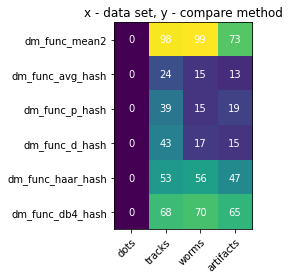

Channel worms, compare worms vs dots, threshold: -11.058930050864557, fp/fn percent: 2.699283002952341 %
Channel worms, compare worms vs tracks, threshold: -8.065581456192543, fp/fn percent: 45.54900308901994 %
Channel worms, compare worms vs artifacts, threshold: -7.849311996206374, fp/fn percent: 49.036777583187394 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.94306199915648 %
Channel worms, compare worms vs tracks, threshold: 0.0017153920391686085, fp/fn percent: 38.13535523729289 %
Channel worms, compare worms vs artifacts, threshold: 0.0019063483653589683, fp/fn percent: 41.33099824868651 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.43694643610291 %
Channel worms, compare worms vs tracks, threshold: 0.017664802144970414, fp/fn percent: 45.54900308901994 %
Channel worms, compare worms vs artifacts, threshold: 0.009795918367346938, fp/fn percent: 40.893169877408056 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn 

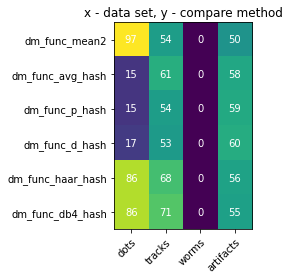

Channel worms, compare worms vs dots, threshold: -5.516561114020541, fp/fn percent: 0.25305778152678193 %
Channel worms, compare worms vs tracks, threshold: 0.21394240458009645, fp/fn percent: 30.63746138725077 %
Channel worms, compare worms vs artifacts, threshold: 0.7553646613312281, fp/fn percent: 41.155866900175134 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.94306199915648 %
Channel worms, compare worms vs tracks, threshold: 1.0, fp/fn percent: 40.69081718618366 %
Channel worms, compare worms vs artifacts, threshold: 1.0, fp/fn percent: 49.38704028021016 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.43694643610291 %
Channel worms, compare worms vs tracks, threshold: 12.0, fp/fn percent: 46.47570907048582 %
Channel worms, compare worms vs artifacts, threshold: 10.0, fp/fn percent: 44.65849387040281 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 82.37030788696752 %
Channel worms, compare worms vs tracks

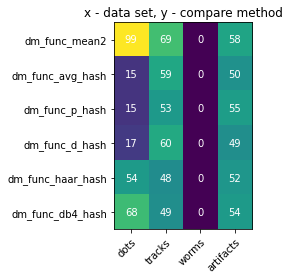

Channel worms, compare worms vs dots, threshold: -10.788453178268721, fp/fn percent: 2.446225221425559 %
Channel worms, compare worms vs tracks, threshold: -8.035767462146982, fp/fn percent: 46.05447907891042 %
Channel worms, compare worms vs artifacts, threshold: -8.24448657448536, fp/fn percent: 40.80560420315236 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.85870940531422 %
Channel worms, compare worms vs tracks, threshold: 0.001736111111111111, fp/fn percent: 38.107273237854535 %
Channel worms, compare worms vs artifacts, threshold: 0.002066115702479339, fp/fn percent: 42.03152364273205 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.22606495149726 %
Channel worms, compare worms vs tracks, threshold: 0.017777777777777778, fp/fn percent: 45.80174108396518 %
Channel worms, compare worms vs artifacts, threshold: 0.017554584779035792, fp/fn percent: 46.234676007005255 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn per

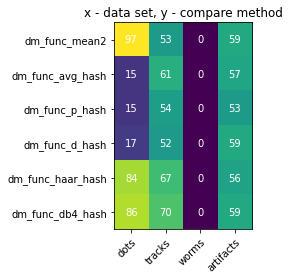

Channel worms, compare worms vs dots, threshold: -5.174514698196921, fp/fn percent: 0.1687051876845213 %
Channel worms, compare worms vs tracks, threshold: 0.243362353227786, fp/fn percent: 30.440887391182255 %
Channel worms, compare worms vs artifacts, threshold: 0.8070886880579108, fp/fn percent: 41.24343257443082 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.85870940531422 %
Channel worms, compare worms vs tracks, threshold: 1.0, fp/fn percent: 40.40999719180006 %
Channel worms, compare worms vs artifacts, threshold: 1.0, fp/fn percent: 48.86164623467601 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 84.22606495149726 %
Channel worms, compare worms vs tracks, threshold: 12.0, fp/fn percent: 46.22297107554058 %
Channel worms, compare worms vs artifacts, threshold: 16.0, fp/fn percent: 49.299474605954465 %
Channel worms, compare worms vs dots, threshold: 0.0, fp/fn percent: 82.37030788696752 %
Channel worms, compare worms vs tracks, 

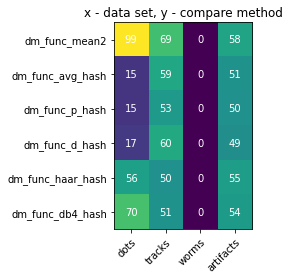

Channel tracks, compare tracks vs dots, threshold: -11.494229012450447, fp/fn percent: 3.6639676113360324 %
Channel tracks, compare tracks vs worms, threshold: -8.065581486394667, fp/fn percent: 45.54900308901994 %
Channel tracks, compare tracks vs artifacts, threshold: -8.022282989407183, fp/fn percent: 44.24683373753705 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 99.47368421052632 %
Channel tracks, compare tracks vs worms, threshold: 0.0017153920391686085, fp/fn percent: 38.13535523729289 %
Channel tracks, compare tracks vs artifacts, threshold: 0.0, fp/fn percent: 90.94583670169766 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 60.93117408906883 %
Channel tracks, compare tracks vs worms, threshold: 0.017664802144970414, fp/fn percent: 45.54900308901994 %
Channel tracks, compare tracks vs artifacts, threshold: 0.009938306477258699, fp/fn percent: 40.58205335489086 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn pe

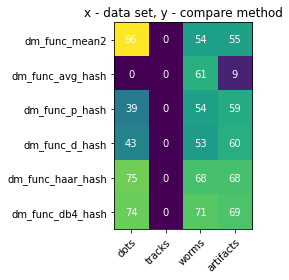

Channel tracks, compare tracks vs dots, threshold: -6.528604077590739, fp/fn percent: 1.3157894736842104 %
Channel tracks, compare tracks vs worms, threshold: 0.21394241450888277, fp/fn percent: 30.63746138725077 %
Channel tracks, compare tracks vs artifacts, threshold: 0.0, fp/fn percent: 38.453247103206685 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 99.47368421052632 %
Channel tracks, compare tracks vs worms, threshold: 1.0, fp/fn percent: 40.69081718618366 %
Channel tracks, compare tracks vs artifacts, threshold: 0.0, fp/fn percent: 90.94583670169766 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 60.93117408906883 %
Channel tracks, compare tracks vs worms, threshold: 12.0, fp/fn percent: 46.47570907048582 %
Channel tracks, compare tracks vs artifacts, threshold: 8.0, fp/fn percent: 51.091350040420366 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 56.19433198380567 %
Channel tracks, compare tracks vs wor

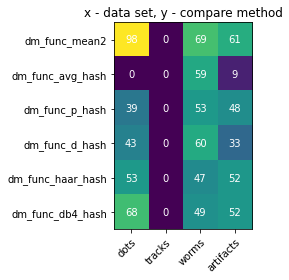

Channel tracks, compare tracks vs dots, threshold: -11.366264884458936, fp/fn percent: 3.54251012145749 %
Channel tracks, compare tracks vs worms, threshold: -8.035767632130288, fp/fn percent: 46.05447907891042 %
Channel tracks, compare tracks vs artifacts, threshold: -8.349442433274675, fp/fn percent: 45.91754244139047 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 99.47368421052632 %
Channel tracks, compare tracks vs worms, threshold: 0.001736111111111111, fp/fn percent: 38.107273237854535 %
Channel tracks, compare tracks vs artifacts, threshold: 0.0, fp/fn percent: 90.8919428725411 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 60.8502024291498 %
Channel tracks, compare tracks vs worms, threshold: 0.017777777777777778, fp/fn percent: 45.80174108396518 %
Channel tracks, compare tracks vs artifacts, threshold: 0.023406113038714392, fp/fn percent: 48.77391538668823 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percen

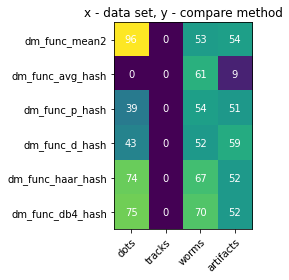

Channel tracks, compare tracks vs dots, threshold: -6.323144123270078, fp/fn percent: 1.3360323886639678 %
Channel tracks, compare tracks vs worms, threshold: 0.24336244191929624, fp/fn percent: 30.440887391182255 %
Channel tracks, compare tracks vs artifacts, threshold: -0.36426807431052577, fp/fn percent: 45.35165723524656 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 99.47368421052632 %
Channel tracks, compare tracks vs worms, threshold: 1.0, fp/fn percent: 40.40999719180006 %
Channel tracks, compare tracks vs artifacts, threshold: 0.0, fp/fn percent: 90.8919428725411 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 60.8502024291498 %
Channel tracks, compare tracks vs worms, threshold: 12.0, fp/fn percent: 46.22297107554058 %
Channel tracks, compare tracks vs artifacts, threshold: 12.0, fp/fn percent: 44.43546213958502 %
Channel tracks, compare tracks vs dots, threshold: 0.0, fp/fn percent: 56.63967611336032 %
Channel tracks, compar

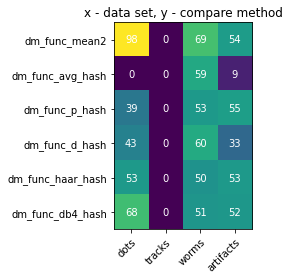

Channel artifacts, compare artifacts vs dots, threshold: -11.68896888996097, fp/fn percent: 4.204680682268941 %
Channel artifacts, compare artifacts vs tracks, threshold: -8.02228295664538, fp/fn percent: 44.24683373753705 %
Channel artifacts, compare artifacts vs worms, threshold: -7.849311994673675, fp/fn percent: 49.036777583187394 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel artifacts, compare artifacts vs tracks, threshold: 0.0, fp/fn percent: 90.94583670169766 %
Channel artifacts, compare artifacts vs worms, threshold: 0.0019063483653589683, fp/fn percent: 41.33099824868651 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel artifacts, compare artifacts vs tracks, threshold: 0.009938306477258699, fp/fn percent: 40.58205335489086 %
Channel artifacts, compare artifacts vs worms, threshold: 0.009795918367346938, fp/fn percent: 40.893169877408056 %
Channel artifacts, c

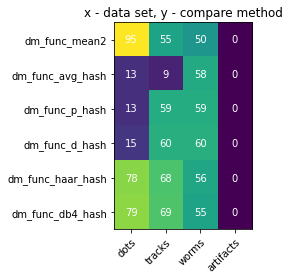

Channel artifacts, compare artifacts vs dots, threshold: -7.501073514877036, fp/fn percent: 8.647362157873859 %
Channel artifacts, compare artifacts vs tracks, threshold: 0.0, fp/fn percent: 38.453247103206685 %
Channel artifacts, compare artifacts vs worms, threshold: 0.7553646440187884, fp/fn percent: 41.155866900175134 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel artifacts, compare artifacts vs tracks, threshold: 0.0, fp/fn percent: 90.94583670169766 %
Channel artifacts, compare artifacts vs worms, threshold: 1.0, fp/fn percent: 49.38704028021016 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 86.67195557318524 %
Channel artifacts, compare artifacts vs tracks, threshold: 8.0, fp/fn percent: 51.091350040420366 %
Channel artifacts, compare artifacts vs worms, threshold: 10.0, fp/fn percent: 44.65849387040281 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 84.3712

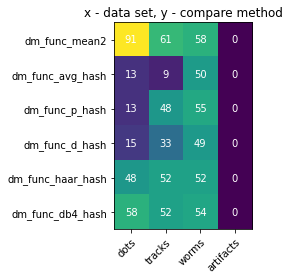

Channel artifacts, compare artifacts vs dots, threshold: -11.499367156554397, fp/fn percent: 4.165013883379611 %
Channel artifacts, compare artifacts vs tracks, threshold: -8.349442433274675, fp/fn percent: 45.94448935596874 %
Channel artifacts, compare artifacts vs worms, threshold: -8.24448657448536, fp/fn percent: 40.80560420315236 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 86.59262197540659 %
Channel artifacts, compare artifacts vs tracks, threshold: 0.0, fp/fn percent: 90.8919428725411 %
Channel artifacts, compare artifacts vs worms, threshold: 0.002066115702479339, fp/fn percent: 42.03152364273205 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 80.80126933756446 %
Channel artifacts, compare artifacts vs tracks, threshold: 0.023406113038714392, fp/fn percent: 48.77391538668823 %
Channel artifacts, compare artifacts vs worms, threshold: 0.017554584779035792, fp/fn percent: 46.234676007005255 %
Channel artifacts, com

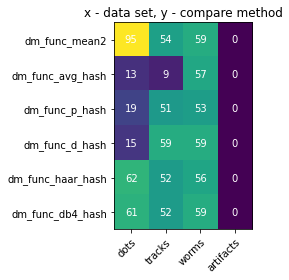

Channel artifacts, compare artifacts vs dots, threshold: -8.349442433274675, fp/fn percent: 26.93375644585482 %
Channel artifacts, compare artifacts vs tracks, threshold: -0.36426807431052577, fp/fn percent: 45.35165723524656 %
Channel artifacts, compare artifacts vs worms, threshold: 0.8070886880579108, fp/fn percent: 41.24343257443082 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 86.59262197540659 %
Channel artifacts, compare artifacts vs tracks, threshold: 0.0, fp/fn percent: 90.8919428725411 %
Channel artifacts, compare artifacts vs worms, threshold: 1.0, fp/fn percent: 48.86164623467601 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn percent: 80.80126933756446 %
Channel artifacts, compare artifacts vs tracks, threshold: 12.0, fp/fn percent: 44.43546213958502 %
Channel artifacts, compare artifacts vs worms, threshold: 16.0, fp/fn percent: 49.299474605954465 %
Channel artifacts, compare artifacts vs dots, threshold: 0.0, fp/fn p

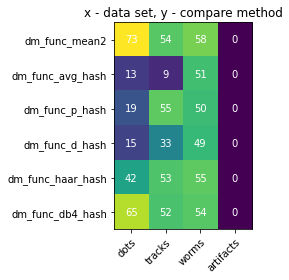

In [3]:
def confusion_matrix2(rows, channel):
    import matplotlib.pyplot as plt

    x_labels = ["dots", "tracks", "worms", "artifacts"]
    y_labels = []

    matrix = np.zeros((len(rows), len(x_labels)), dtype=np.int32)

    for i in range(0, len(rows)):
        for j in range(0, len(x_labels)):
            set_name = x_labels[j]
            (fun_name, cutoff_background, normalize, similarity) = rows[i]

            la = channel
            lb = set_name

            if la == lb:
                continue

            a = similarity[la]
            b = similarity[lb]


            threshold, percent = find_threshold(a, b)

            print('Channel %s, compare %s vs %s, threshold: %s, fp/fn percent: %s %%' % (la, la, lb, str(threshold), str(percent)))
            #plot_threshold(a, b, threshold, la, lb)

            matrix[i, j] = int(100 - percent)
        y_labels.append(rows[i][0])

    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
    ax.set_yticks(np.arange(len(y_labels)), labels=y_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(0, len(rows)):
        for j in range(0, len(x_labels)):
            text = ax.text(j, i, matrix[i, j], ha="center", va="center", color="w")

    ax.set_title("x - data set, y - compare method")
    fig.tight_layout()
    plt.show()

for autoencoder, name in autoencoders:
    for cutoff_background in cutoff_backgrounds:
        for normalize in normalizes:
            rows = config[(autoencoder, cutoff_background, normalize)]
            confusion_matrix2(rows, name)
